In [23]:
import numpy as np
from python_vehicle_simulator.vehicles import otter
from python_vehicle_simulator.lib import *

In [24]:
SAMPLE_TIME = 0.02
N = 10000

Inputs:
    r: desired heading angle (deg)
    V_current: current speed (m/s)
    beta_current: current direction (deg)
    tau_X: surge force, pilot input (N)        
"""

In [25]:
vehicle = otter(
    controlSystem='headingAutopilot',
    r=60.0,
    V_current=0.0,
    beta_current=0.0,
    tau_X=200.0
    ) 

printVehicleinfo(vehicle, SAMPLE_TIME, N)

---------------------------------------------------------------------------------------
Otter USV (see 'otter.py' for more details)
Length: 2.0 m
Heading autopilot, psi_d = 60.0 deg
Sampling frequency: 50 Hz
Simulation time: 200 seconds
---------------------------------------------------------------------------------------


In [33]:

def main(vehicle):    
    
    [simTime, simData] = simulate(N, SAMPLE_TIME, vehicle)
    
    plotVehicleStates(simTime, simData, 1)                    
    plotControls(simTime, simData, vehicle, 2) 
    
    plt.show()
    plt.close()



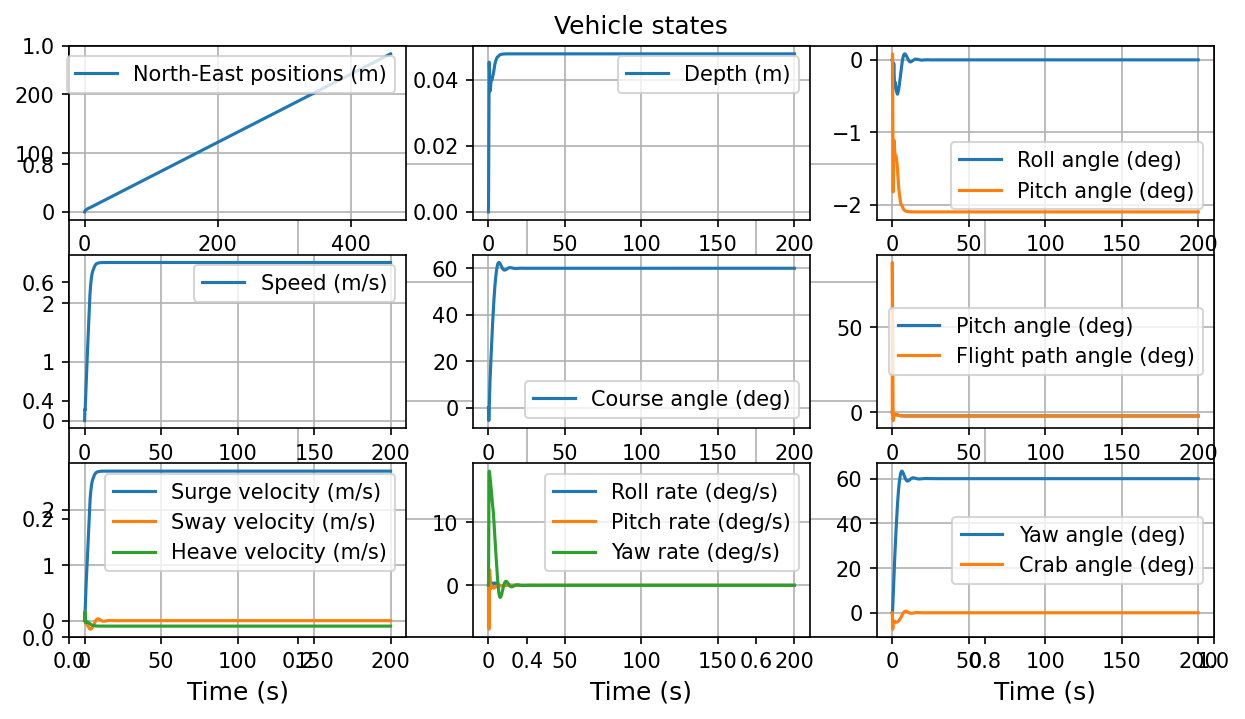

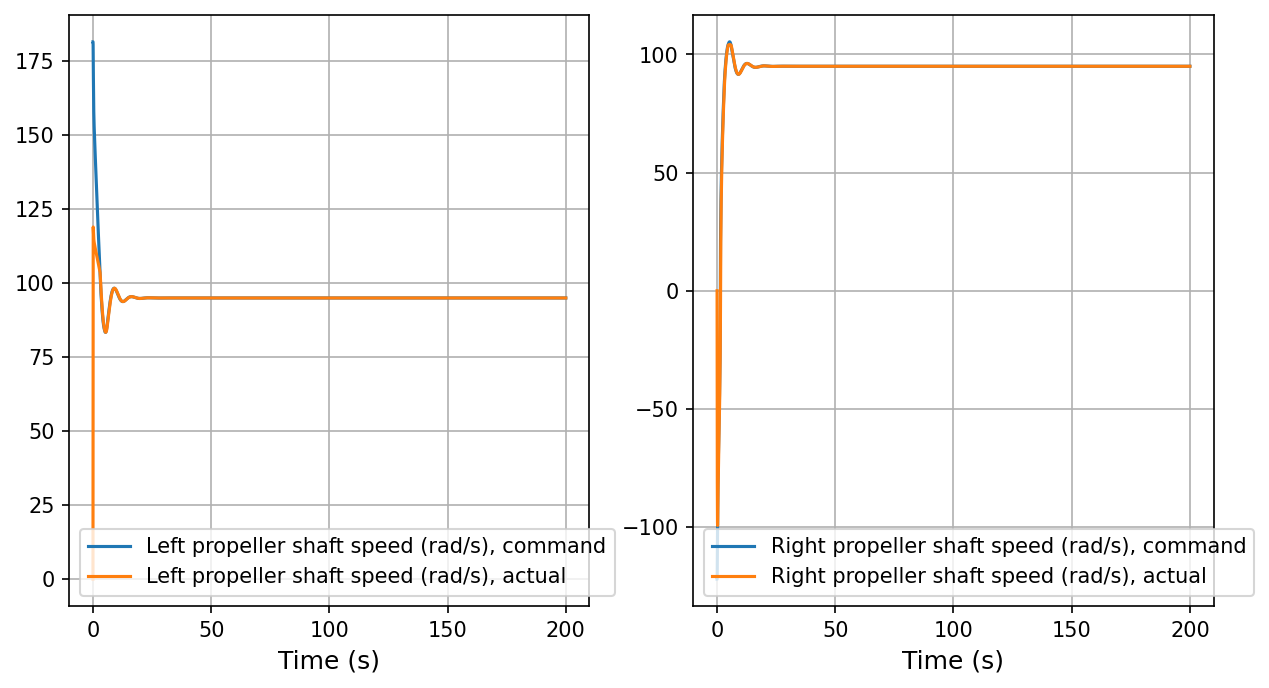

In [34]:
vehicle.controlSystem = "headingAutopilotPID"
vehicle.Kp = 200  #258.75 
vehicle.Ki = 0   #64.6875
vehicle.Kd = 200  #165.6

main(vehicle)

# User interface

In [28]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objects as go

In [ ]:
def simulate_vessel(vehicle):
    [simTime, simData] = simulate(N, SAMPLE_TIME, vehicle)
    return simTime, simData

def R2D(value):  # radians to degrees
    return value * 180 / math.pi



In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Curve Plotter"),
    
    # Input fields for parameters
    html.Div([
        html.Label("Input A"),
        dcc.Input(id="input-a", type="number", value=1),
    ], style={"padding": "10px"}),
    
    html.Div([
        html.Label("Input B"),
        dcc.Input(id="input-b", type="number", value=1),
    ], style={"padding": "10px"}),
    
    html.Div([
        html.Label("Input C"),
        dcc.Input(id="input-c", type="number", value=0),
    ], style={"padding": "10px"}),
    
    # Button to generate plot
    html.Button("Generate Plot", id="submit-button", n_clicks=0),
    
    # Graph to display the curve
    dcc.Graph(id="curve-plot")
])

@app.callback(
    Output("curve-plot", "figure"),
    [Input("submit-button", "n_clicks")],
    [Input("input-a", "value"), Input("input-b", "value"), Input("input-c", "value")]
)
def update_graph(n_clicks, K, P, I):
    # Generate x and y data based on inputs
    [time, data] = simulate_vessel(vehicle)
    t = time[:,0]
    x = data[:, 0]
    y = data[:, 1]
    psi = R2D(ssa(data[:, 5]))
    print(t)

    # Create the figure
    fig = go.Figure(data=go.Scatter(x=t, y=y, mode="lines"))
    fig.update_layout(title="Curve Plot", xaxis_title="time", yaxis_title="psi")

    return fig

if __name__ == "__main__":
    app.run_server(debug=True)

[0.0000e+00 2.0000e-02 4.0000e-02 ... 1.9996e+02 1.9998e+02 2.0000e+02]
